In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
myImputer = SimpleImputer()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
trainData = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
testData = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
testData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
X_test_full = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

X_test = X_test_full

X_test = pd.get_dummies(X_test)

In [5]:
y = trainData["SalePrice"]

X = pd.get_dummies(trainData[features]) 
imputedX = myImputer.fit_transform(X) 
X_test = pd.get_dummies(testData[features]) 
imputedX_test = myImputer.transform(X_test)

trainX, valX, trainY, valY = train_test_split(X, y, random_state = 0)

model = XGBRegressor(n_estimators = 1000, learning_rate = .05, random_state = 0)

model.fit(trainX, trainY, early_stopping_rounds=5, eval_set=[(valX, valY)], verbose=False)


valpredict = model.predict(valX)

print(mean_absolute_error(valY, valpredict))


NameError: name 'features' is not defined

In [6]:
valpredict = model.predict(X_test)

NameError: name 'model' is not defined

In [7]:
# Read the data
X_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2,random_state=0)

In [8]:
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [9]:
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [10]:
def get_scores_n_estimators(n_estimators):
    model = XGBRegressor(n_estimators = n_estimators, learning_rate = .05, random_state = 0)
    clf = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    clf.fit(X_train, y_train)
    preds = clf.predict(X_valid)
    score = mean_absolute_error(y_valid, preds)
    return score

In [11]:
results_n_estimators = {}

for i in range(1,9):
    results_n_estimators[50*i] = get_scores_n_estimators(50*i)

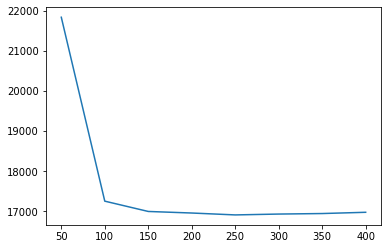

In [12]:
%matplotlib inline
plt.plot(list(results_n_estimators.keys()), list(results_n_estimators.values()))
plt.show()

In [13]:
def get_scores_learning_rate(learning_rate):
    model = XGBRegressor(n_estimators = 250, learning_rate = learning_rate, random_state = 0)
    clf = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    clf.fit(X_train, y_train)
    preds = clf.predict(X_valid)
    score = mean_absolute_error(y_valid, preds)
    print(score)
    return score

In [14]:
results_learning_rate = {}

for i in range(1,20):
    results_learning_rate[.01*i] = get_scores_learning_rate(.01*i)

22299.882999785958
17181.83869327911
16873.90766802226
17013.904805222603
16911.702469499145
16539.246923159248
16975.44656999144
17072.63354826627
16709.360124143837
16650.503050085616
16960.934516802226
16828.891641695205
16541.62243150685
16735.086726776542
17183.79881474743
17317.77638056507
16801.904551048803
16775.087689961474
17505.901407320205


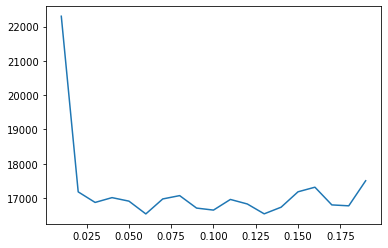

In [15]:
%matplotlib inline
plt.plot(list(results_learning_rate.keys()), list(results_learning_rate.values()))
plt.show()

In [16]:
def get_scores(n_estimators):
    print("begin learning rates for n_estimators: ", n_estimators)
    results_temp = {}
    for i in range(1,20):
        results_temp[.01*i] = get_scores_learning_rate(.01*i)
        
    max_learning_rate = results_temp[.01]
    for i in range(1,20):
        if results_temp[i*.01] < max_learning_rate:
            max_learning_rate = results_temp[i*.01]
            temp_state = i
            
    print(max_learning_rate)
    learning_rate = temp_state*.01
    print("best learning rate for ", n_estimators, learning_rate)
    model = XGBRegressor(n_estimators = n_estimators, learning_rate = learning_rate, random_state = 0)
    clf = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    clf.fit(X_train, y_train)
    preds = clf.predict(X_valid)
    score = mean_absolute_error(y_valid, preds)
    print("score: ", score)
    return score

In [17]:
results = {}

for i in range(1,20):
    results[50*i] = get_scores(50*i)
    
max_n_estimators = results[50]
for i in range(1,20):
    if results[i*50] < max_n_estimators:
        max_n_estimators = results[i*50]
        temp_state = i
print("best score = ", temp_state*50, "n_estimators")

begin learning rates for n_estimators:  50
22299.882999785958
17181.83869327911
16873.90766802226
17013.904805222603
16911.702469499145
16539.246923159248
16975.44656999144
17072.63354826627
16709.360124143837
16650.503050085616
16960.934516802226
16828.891641695205
16541.62243150685
16735.086726776542
17183.79881474743
17317.77638056507
16801.904551048803
16775.087689961474
17505.901407320205
16539.246923159248
best learning rate for  50 0.06
score:  18954.29794520548
begin learning rates for n_estimators:  100
22299.882999785958
17181.83869327911
16873.90766802226
17013.904805222603
16911.702469499145
16539.246923159248
16975.44656999144
17072.63354826627
16709.360124143837
16650.503050085616
16960.934516802226
16828.891641695205
16541.62243150685
16735.086726776542
17183.79881474743
17317.77638056507
16801.904551048803
16775.087689961474
17505.901407320205
16539.246923159248
best learning rate for  100 0.06
score:  16875.420697773974
begin learning rates for n_estimators:  150
22299

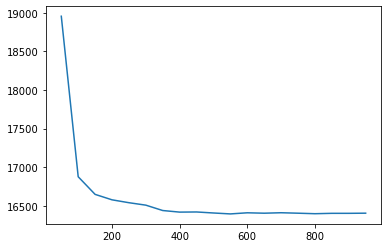

In [18]:
%matplotlib inline
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [19]:
# Define model
model = XGBRegressor(n_estimators = 550, learning_rate = .06, random_state = 0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print(mean_absolute_error(y_valid, preds))

16394.146163313355


In [20]:
scores = -1 * cross_val_score(clf, X_full, y, cv = 5, scoring='neg_mean_absolute_error')

print(scores.mean())

16351.990836365581


In [21]:
valpredict = clf.predict(X_test)

In [22]:
output = pd.DataFrame({'Id': testData.Id, 'SalePrice': valpredict})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
